In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from elasticsearch import Elasticsearch

%matplotlib inline

In [2]:
es = Elasticsearch(['elastic:9200'])

res = es.search(index='games_test', body={
    "size": 100,
    "query": {"match_all": {}}
})
print("Got %d hits" % res['hits']['total'])

Got 107 hits


In [3]:
def language_data(response):
    languages = set()
    number= []
    lng = []
    data = {}
    for val in response['hits']['hits']:
        for lg in val['_source']['languages']:
            languages.add(lg)
            lng.append(lg)
    for lg in languages:
        number.append(lng.count(lg))
    data['languages'] = list(languages)
    data['count'] = number
    return pd.DataFrame.from_dict(data)

lng_data = language_data(res)
lng_data

,languages,count
0,Arabic,3
1,Japanese,43
2,Greek,5
3,English,100
4,Finnish,17
5,Korean,46
6,Ukrainian,11
7,Simplified Chinese,49
8,Turkish,31
9,Hungarian,16


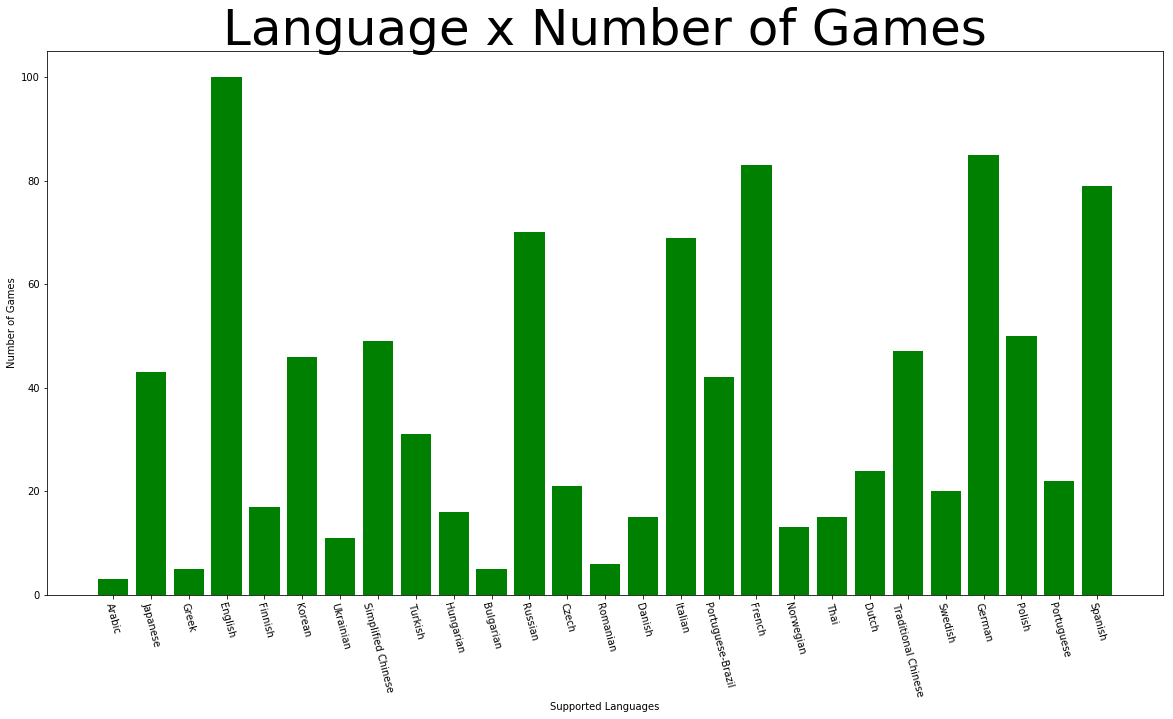

In [6]:
plt.figure(figsize=(20,10), facecolor='w')
plt.grid(False)
plt.xlabel('Supported Languages')
plt.ylabel('Number of Games')
plt.title('Language x Number of Games', fontdict={'fontsize': 50})
plt.bar(lng_data['languages'], lng_data['count'], color='green')
plt.xticks(rotation=-75)
plt.show()